In [1]:
import os
os.chdir("..")
import pandas as pd

outcomes = pd.read_pickle("data/outcomes_concat.pkl")
stns = pd.read_pickle("data/stop_and_search_concat.pkl")
street = pd.read_pickle("data/street_concat.pkl")

In [2]:
highest_crime_outcome = street["Crime ID"].value_counts() > 1
outcomes.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Outcome type'],
      dtype='object')

In [3]:
import re
street.loc[~street["LSOA name"].isna(), "Borough"] = street["LSOA name"].dropna().apply(lambda x: re.split("[0-9]", x)[0].strip())
outcomes.loc[~outcomes["LSOA name"].isna(), "Borough"] = outcomes["LSOA name"].dropna().apply(lambda x: re.split("[0-9]", x)[0].strip())
print(street["Borough"].value_counts().head(32))

Borough
Westminster               1002407
Tower Hamlets              603522
Lambeth                    598397
Newham                     574592
Southwark                  572554
Camden                     565239
Croydon                    540321
Ealing                     528648
Hackney                    515077
Brent                      506500
Haringey                   483547
Islington                  475936
Barnet                     470700
Hillingdon                 464214
Enfield                    461455
Lewisham                   451411
Wandsworth                 424572
Hounslow                   419311
Greenwich                  411717
Waltham Forest             408219
Redbridge                  395028
Bromley                    377899
Hammersmith and Fulham     360896
Kensington and Chelsea     339569
Barking and Dagenham       314997
Havering                   300654
Harrow                     259856
Bexley                     253072
Merton                     235623
Sutton

In [4]:
print(len(set(street["Crime ID"]) - set(outcomes["Crime ID"])))
print(len(set(outcomes["Crime ID"])))

8812194
4870779


In [5]:
street["Falls within"].unique()

array(['Metropolitan Police Service'], dtype=object)

In [6]:
london_bouroughs = ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'City of Westminster', 'Richmond Upon Thames']



In [7]:
street.count()

Crime ID                  9630501
Month                    14131200
Reported by              13581480
Falls within             14131200
Longitude                13968895
Latitude                 13968895
Location                 14131200
LSOA code                13968895
LSOA name                13968895
Crime type               14131200
Last outcome category     9569133
Context                         0
Borough                  13968895
dtype: int64

In [8]:
svc = street["Crime ID"].value_counts()
svc.max() 

206

In [9]:
high_perpetrator_crimes = set(svc[svc>2].index)

<Axes: xlabel='Month'>

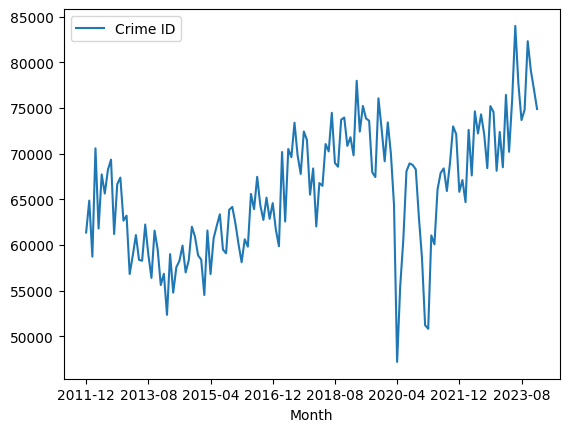

In [10]:
mask = street["Crime ID"].apply(lambda cid: cid in highest_crime_outcome)
street[mask].groupby("Month").count().plot(y="Crime ID")

In [11]:
stns.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,NaN,NaN
1,Person and Vehicle search,2015-03-31T23:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN
2,Person search,2015-03-31T23:05:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Black or Black British - Any other Black ethni...,Black,Misuse of Drugs Act 1971 (section 23),NaN,Offender given drugs possession warning,NaN,NaN
3,Person search,2015-03-31T23:09:00+00:00,NaN,NaN,NaN,NaN,Male,NaN,Not Stated (NS),Black,Misuse of Drugs Act 1971 (section 23),NaN,Nothing found - no further action,NaN,NaN
4,Person search,2015-03-31T23:15:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Asian or Asian British - Any other Asian ethni...,Asian,Police and Criminal Evidence Act 1984 (section 1),NaN,Nothing found - no further action,NaN,NaN


In [12]:
street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Borough
0,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.145949,51.593914,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
1,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
2,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
3,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham
4,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN,Barking and Dagenham


In [13]:
outcomes.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type,Borough
0,6b1f92248fdd1da48149ecf656b26d697f643ca42b23a1...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.101143,51.372665,On or near SURREY STREET,E01001042,Croydon 024B,Offender fined,Croydon
1,1babcc02dce29af22b4f3650e1e6f22c83a54cfdcfa372...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.068047,51.573901,On or near EGERTON ROAD,E01001826,Hackney 004E,Offender given community sentence,Hackney
2,2a6625fb7b8ccab818be6b122f7d63b70b062e1aba09b4...,2012-01,Metropolitan Police Service,Metropolitan Police Service,0.214173,51.521207,On or near ORESTON ROAD,E01002344,Havering 029B,Offender given suspended prison sentence,Havering
3,6faae9efd06d209ecbba41705e764110ad6308ae75216e...,2012-01,Metropolitan Police Service,Metropolitan Police Service,-0.068395,51.516984,On or near Conference/Exhibition Centre,E01004309,Tower Hamlets 015D,Offender sent to prison,Tower Hamlets
4,5463dff8a94e52b8c9d992b1e2cc781836640376a6bab8...,2012-01,Metropolitan Police Service,Metropolitan Police Service,0.049091,51.489739,On or near LYFORD STREET,E01001706,Greenwich 005B,Offender given community sentence,Greenwich


In [14]:
asbs = street[street["Crime ID"].isna()]
non_asb = street[~street["Crime ID"].isna()]

In [15]:
crime_types = non_asb["Crime type"].unique()

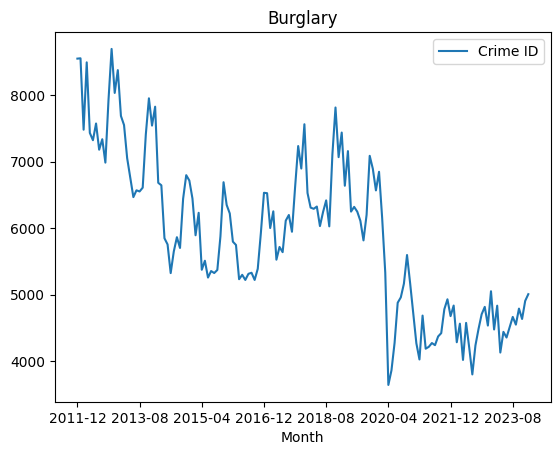

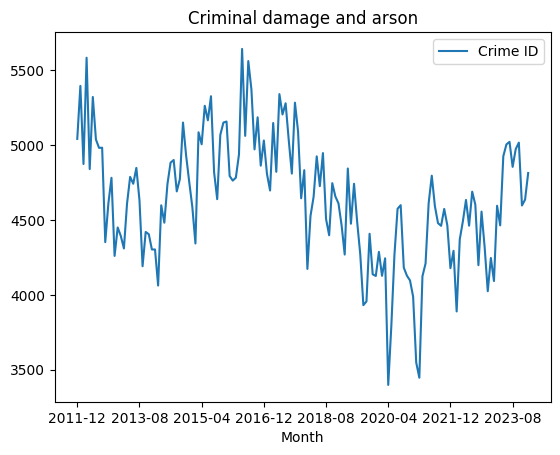

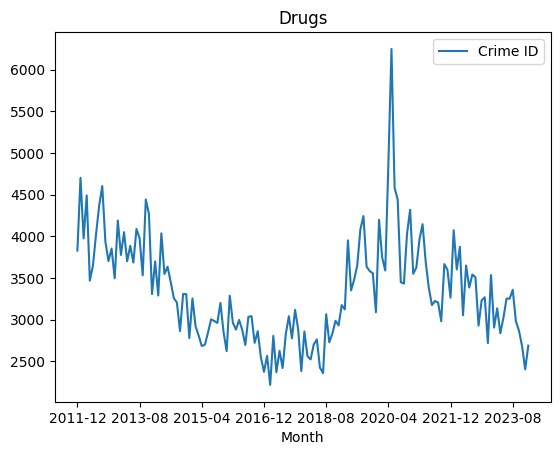

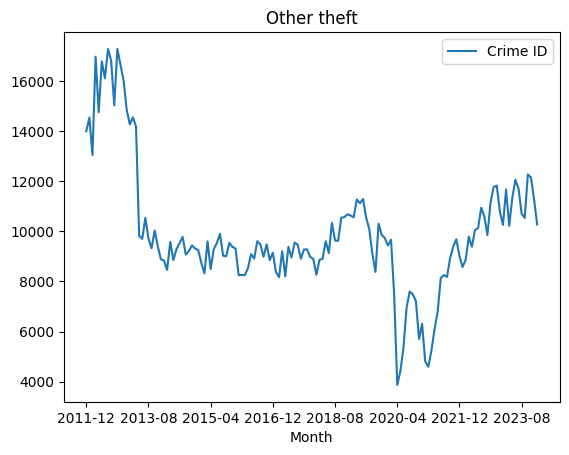

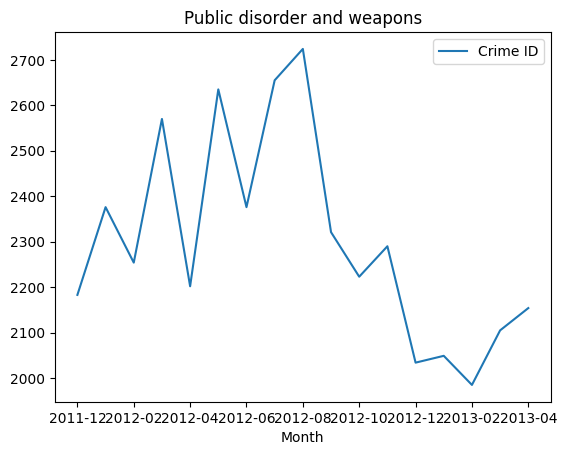

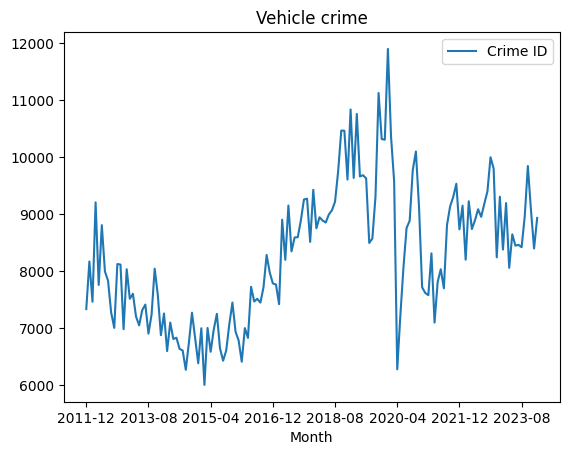

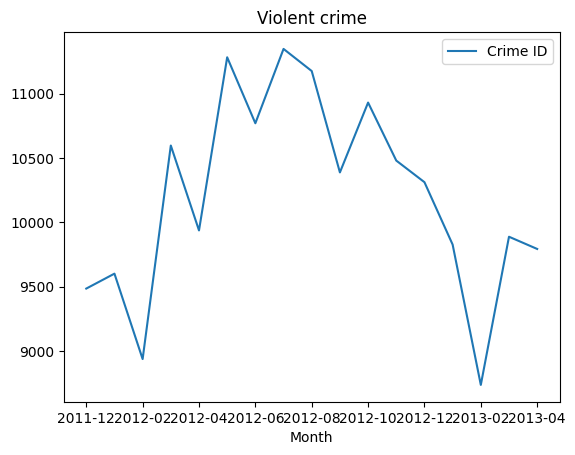

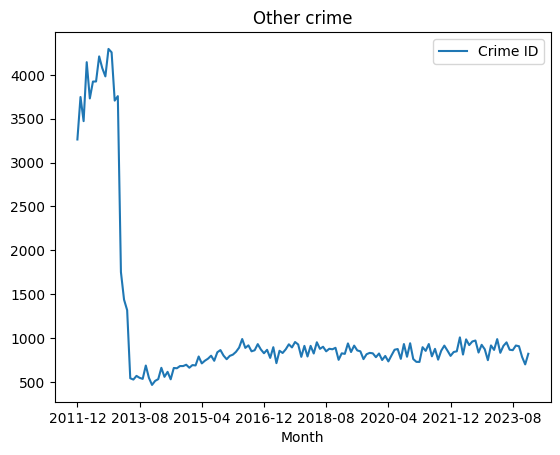

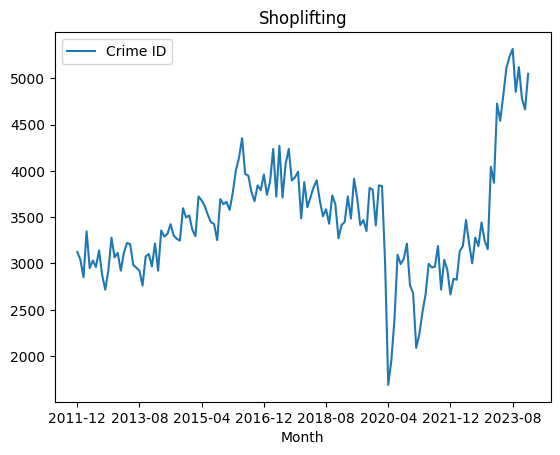

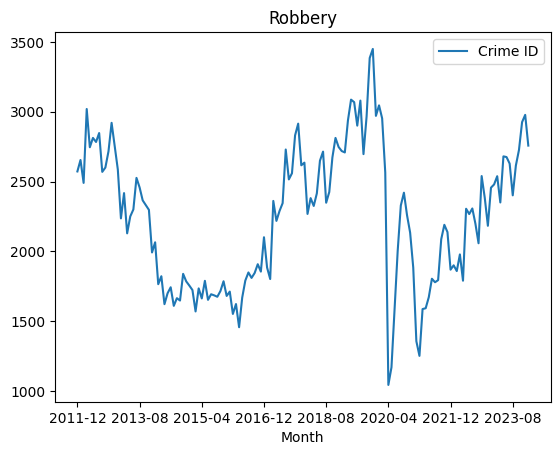

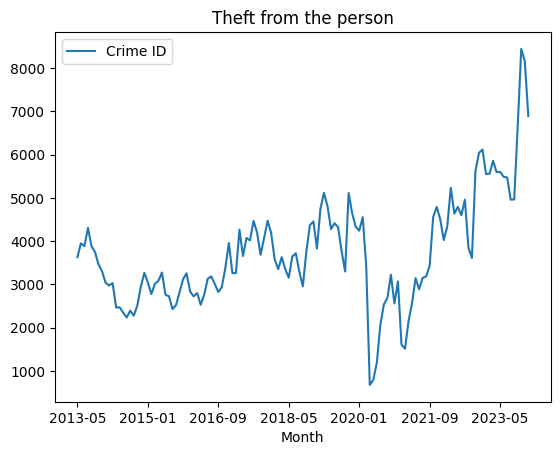

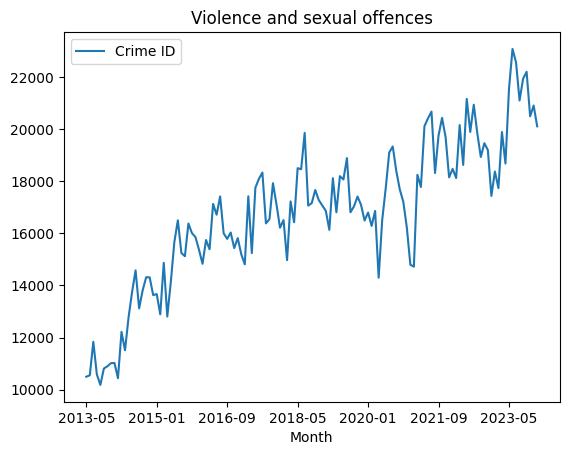

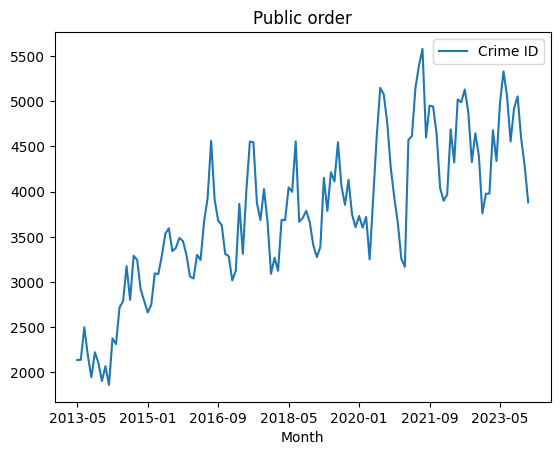

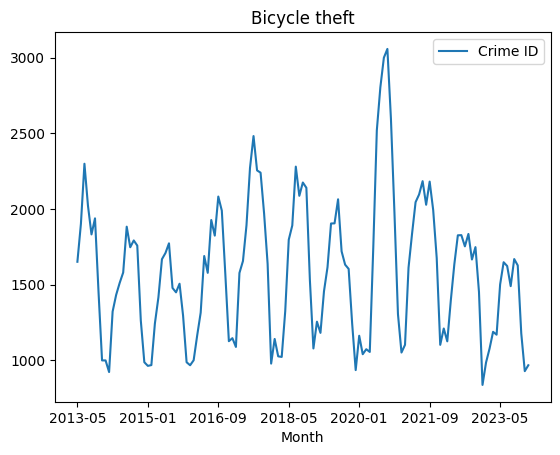

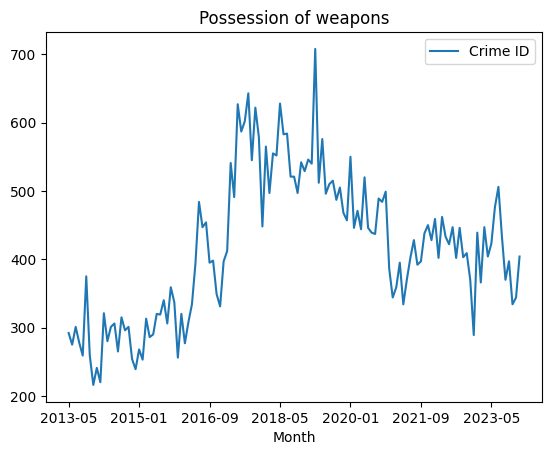

In [16]:
crs = {crime_type: non_asb[non_asb["Crime type"] == crime_type] for crime_type in crime_types}
for cr, df in crs.items():
    df.groupby("Month").nunique().plot(y="Crime ID", title=cr)

<Axes: xlabel='Month'>

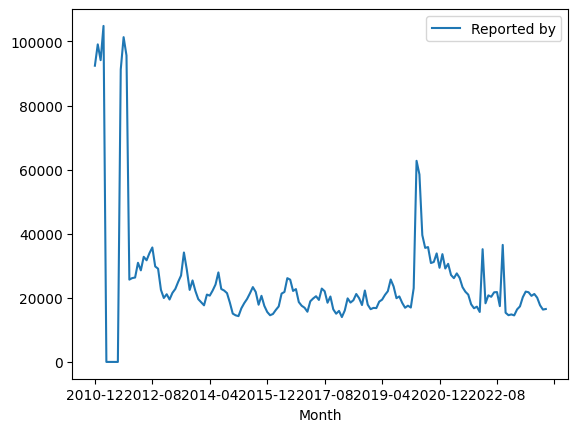

In [17]:
asbs.groupby("Month").count().plot(y="Reported by")

In [18]:
non_asb["Year"] = non_asb["Month"].apply(lambda x: x.split("-")[0])
non_asb["Month"] = non_asb["Month"].apply(lambda x: x.split("-")[1])
def qmap(x):
    return (max(x, 1) -1)//3 + 1

non_asb["Quarter"] = non_asb["Month"].apply(lambda x: qmap(int(x)))
non_asb.head()

/tmp/ipykernel_21603/1614845795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_asb["Year"] = non_asb["Month"].apply(lambda x: x.split("-")[0])
/tmp/ipykernel_21603/1614845795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_asb["Month"] = non_asb["Month"].apply(lambda x: x.split("-")[1])
/tmp/ipykernel_21603/1614845795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Borough,Year,Quarter
8,d44d2e44e5ffdb23a9246a6b6437810b6142b0d25cf664...,12,Metropolitan Police Service,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,E01000027,Barking and Dagenham 001A,Burglary,NaN,NaN,Barking and Dagenham,2011,4
9,a27350b5f3c9f91f082e9d4f2f72418a19ca7600e21122...,12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Burglary,NaN,NaN,Barking and Dagenham,2011,4
10,41da16507d675c56eff4a9fba75507b69d274536ac6bc6...,12,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Burglary,NaN,NaN,Barking and Dagenham,2011,4
11,5d8fb40b2496567057345c699043e8005fbc688cf4c1bc...,12,Metropolitan Police Service,Metropolitan Police Service,0.135866,51.587336,On or near Gibbfield Close,E01000027,Barking and Dagenham 001A,Burglary,NaN,NaN,Barking and Dagenham,2011,4
12,709e0408bb402ab0b0358519c2766228736f7d91974729...,12,Metropolitan Police Service,Metropolitan Police Service,0.141143,51.590873,On or near Furze Farm Close,E01000027,Barking and Dagenham 001A,Criminal damage and arson,NaN,NaN,Barking and Dagenham,2011,4


In [19]:
q = non_asb.groupby(["Year", "Quarter", "Borough"])["Crime ID"].nunique()

q = q.reset_index()
lb = set(london_bouroughs)
ql = q[q["Borough"].apply(lambda x: x in lb)]

In [20]:
ql["YQ"] = q["Year"].apply(lambda x: str(x)) + "-" + q["Quarter"].apply(lambda x: str(x))
ql

/tmp/ipykernel_21603/2329889816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ql["YQ"] = q["Year"].apply(lambda x: str(x)) + "-" + q["Quarter"].apply(lambda x: str(x))


,Year,Quarter,Borough,Crime ID,YQ
0,2011,4,Barking and Dagenham,1374,2011-4
1,2011,4,Barnet,1965,2011-4
2,2011,4,Bexley,806,2011-4
3,2011,4,Brent,2342,2011-4
4,2011,4,Bromley,1782,2011-4
...,...,...,...,...,...
8132,2024,1,Southwark,2971,2024-1
8136,2024,1,Sutton,1130,2024-1
8147,2024,1,Tower Hamlets,2645,2024-1
8151,2024,1,Waltham Forest,1786,2024-1


/home/dbalm/.local/share/virtualenvs/DC1-WMMS7aKR/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Borough
Barking and Dagenham      Axes(0.125,0.11;0.775x0.77)
Barnet                    Axes(0.125,0.11;0.775x0.77)
Bexley                    Axes(0.125,0.11;0.775x0.77)
Brent                     Axes(0.125,0.11;0.775x0.77)
Bromley                   Axes(0.125,0.11;0.775x0.77)
Camden                    Axes(0.125,0.11;0.775x0.77)
Croydon                   Axes(0.125,0.11;0.775x0.77)
Ealing                    Axes(0.125,0.11;0.775x0.77)
Enfield                   Axes(0.125,0.11;0.775x0.77)
Greenwich                 Axes(0.125,0.11;0.775x0.77)
Hackney                   Axes(0.125,0.11;0.775x0.77)
Hammersmith and Fulham    Axes(0.125,0.11;0.775x0.77)
Haringey                  Axes(0.125,0.11;0.775x0.77)
Harrow                    Axes(0.125,0.11;0.775x0.77)
Havering                  Axes(0.125,0.11;0.775x0.77)
Hillingdon                Axes(0.125,0.11;0.775x0.77)
Hounslow                  Axes(0.125,0.11;0.775x0.77)
Islington                 Axes(0.125,0.11;0.775x0.77)
Kensington and Chels

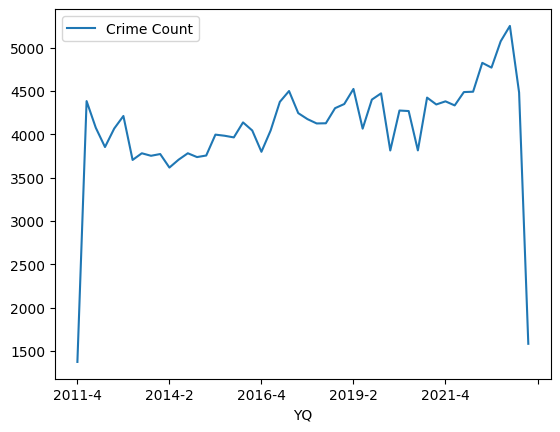

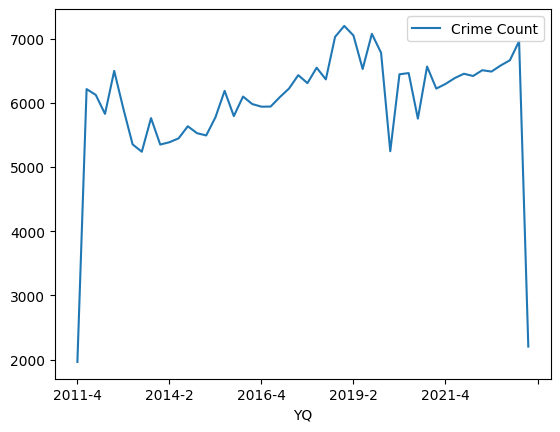

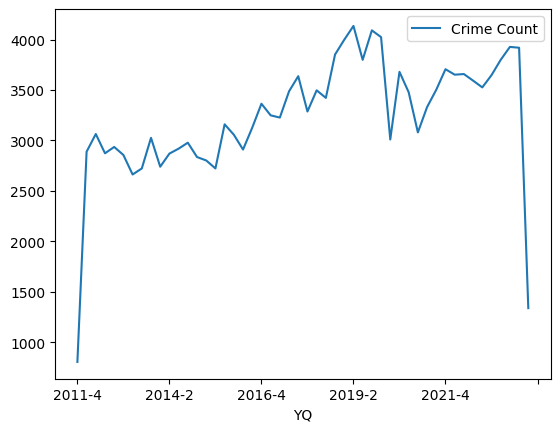

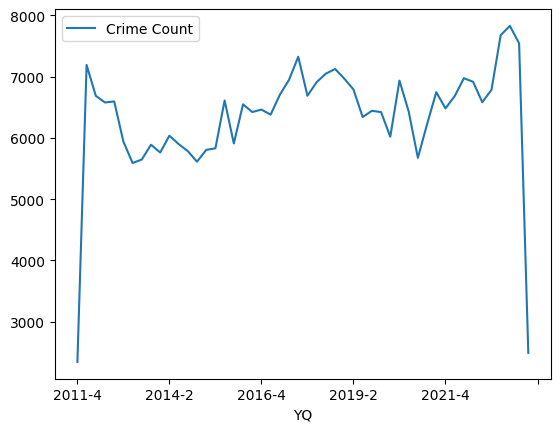

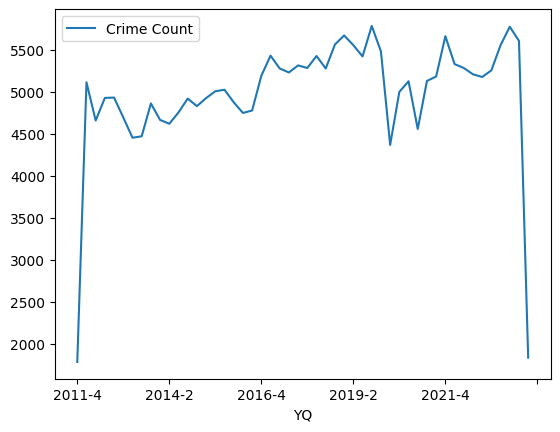

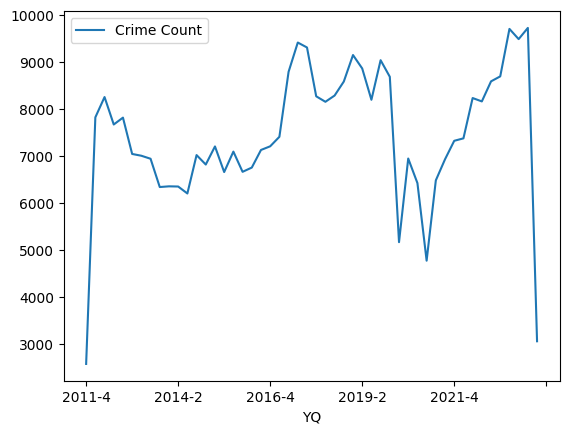

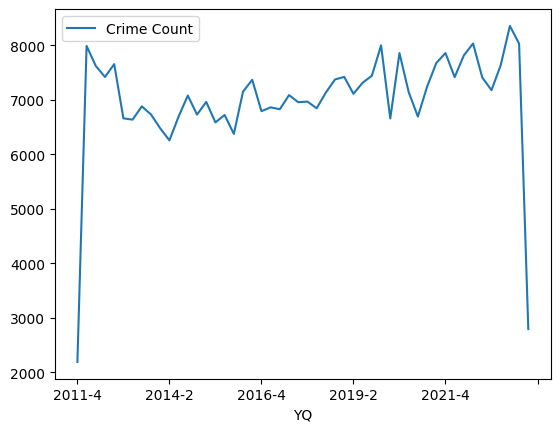

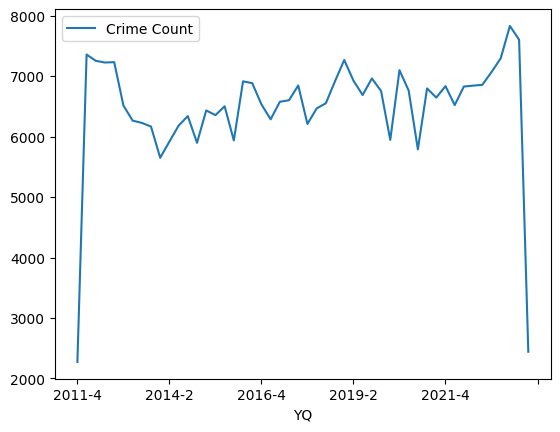

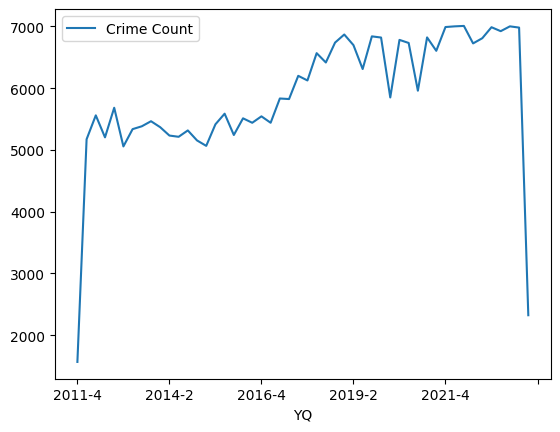

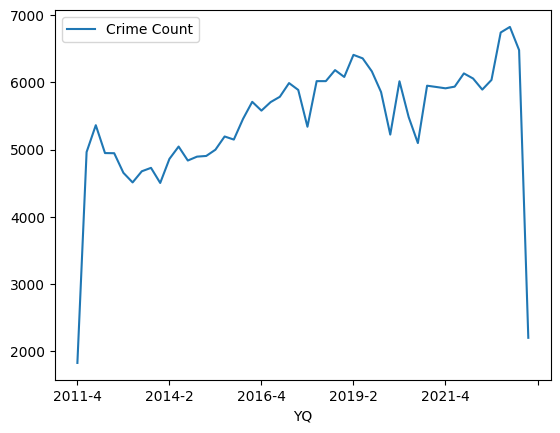

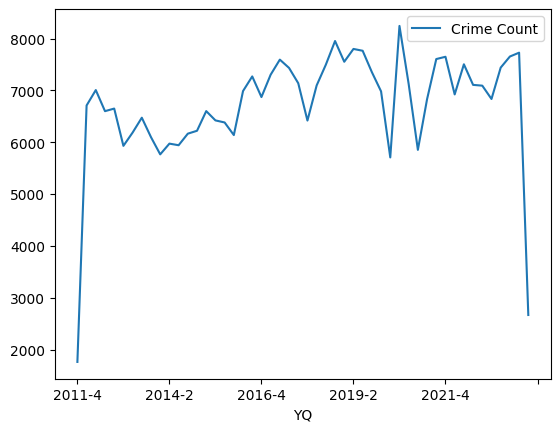

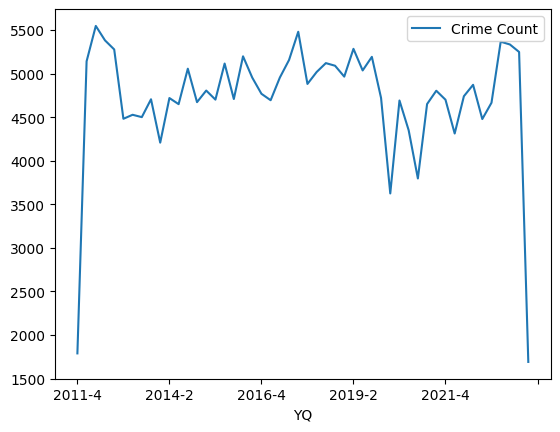

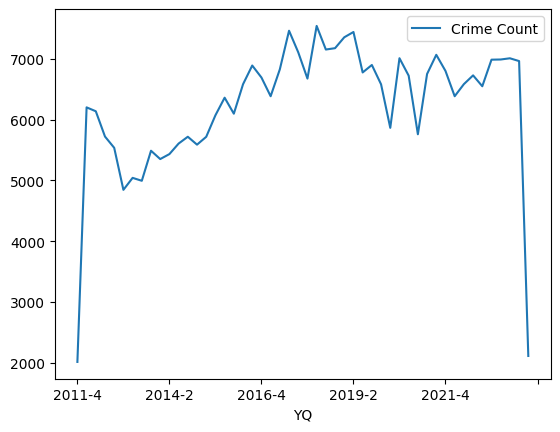

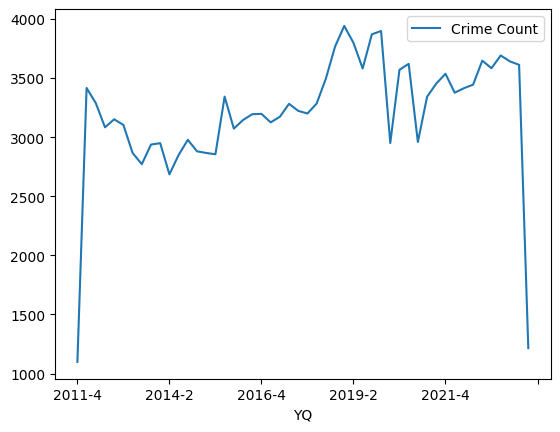

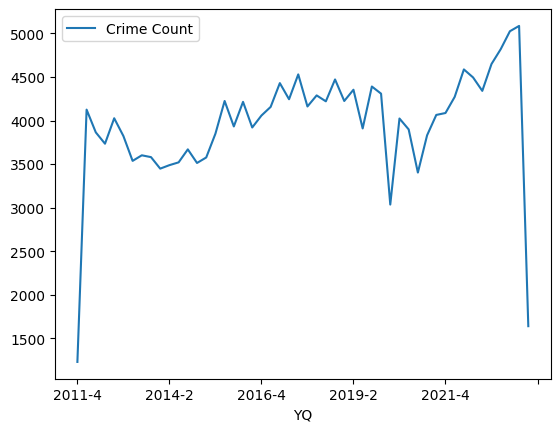

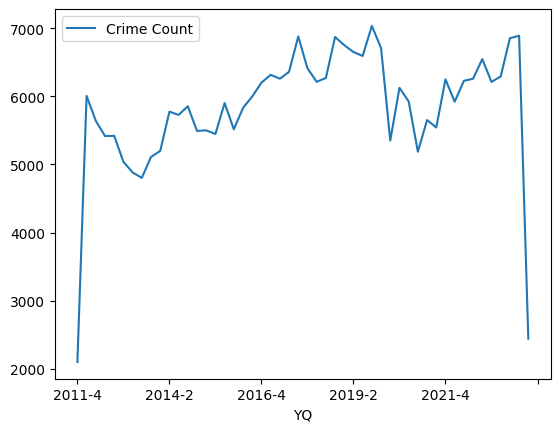

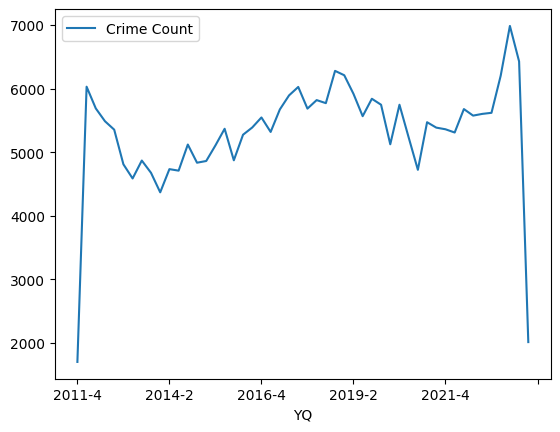

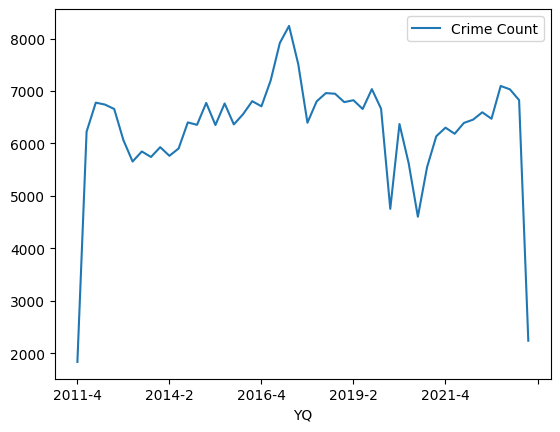

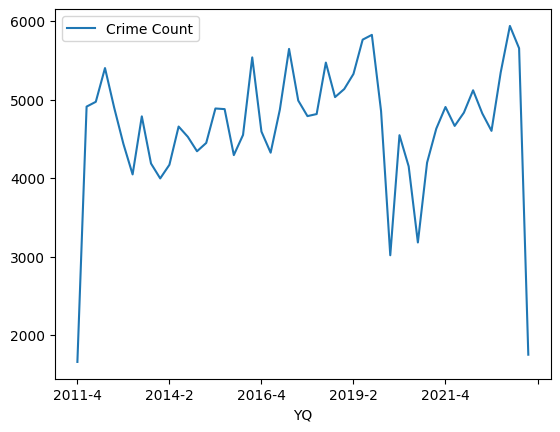

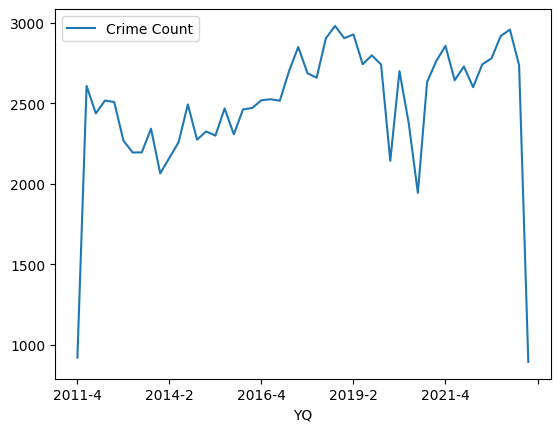

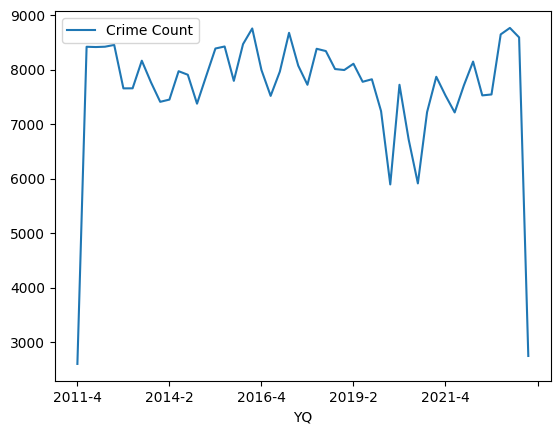

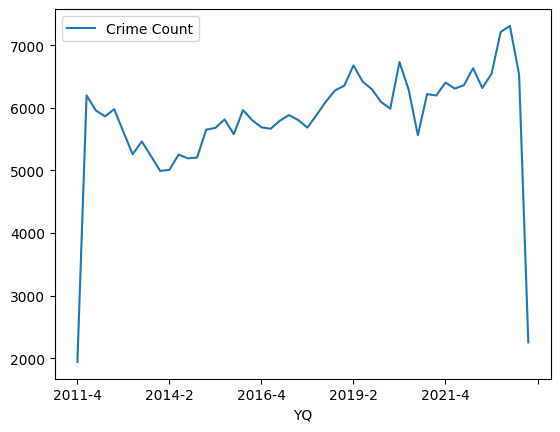

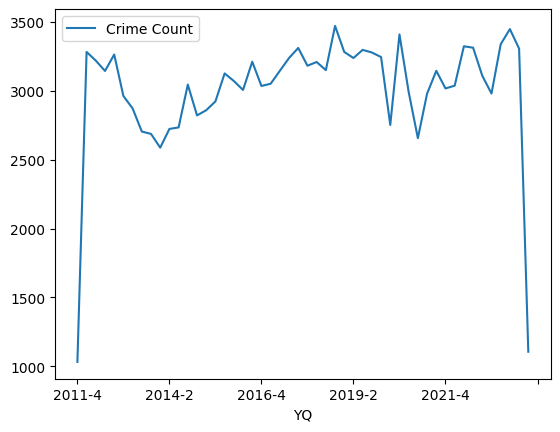

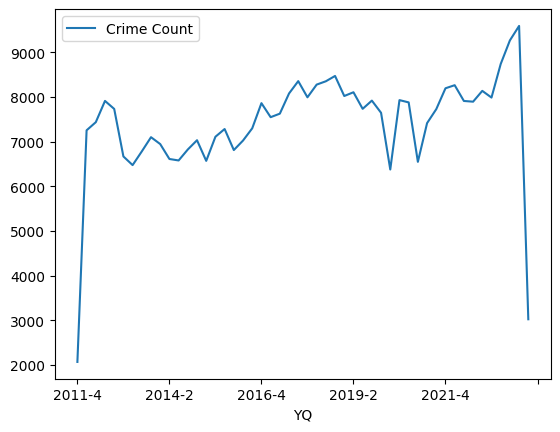

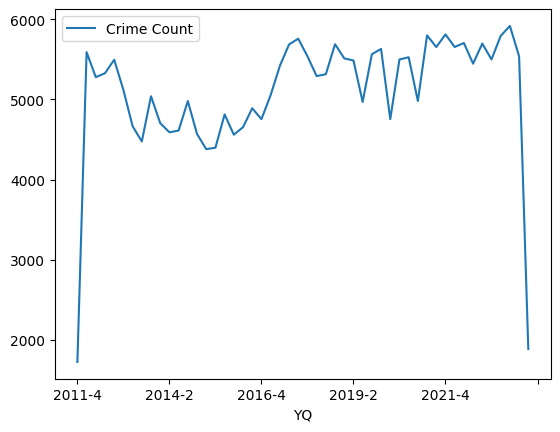

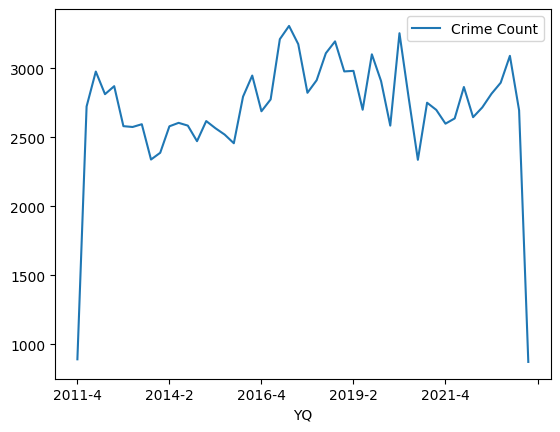

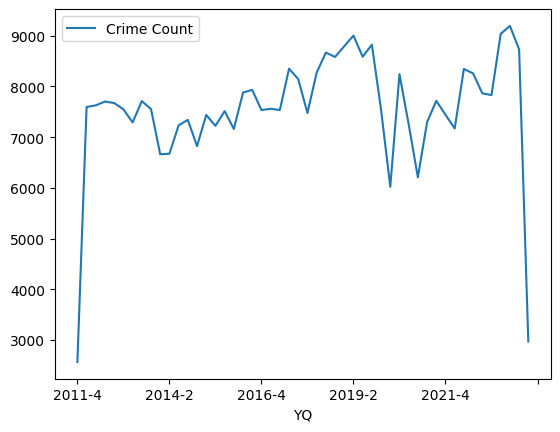

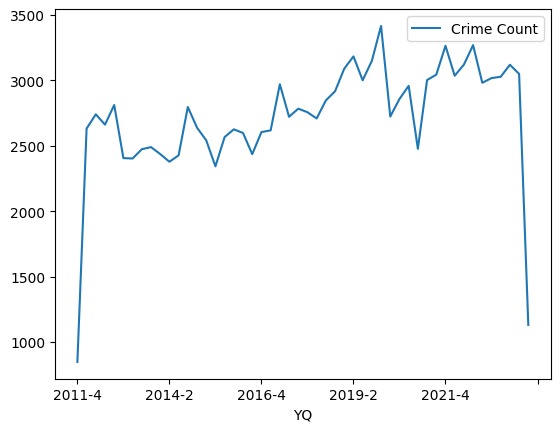

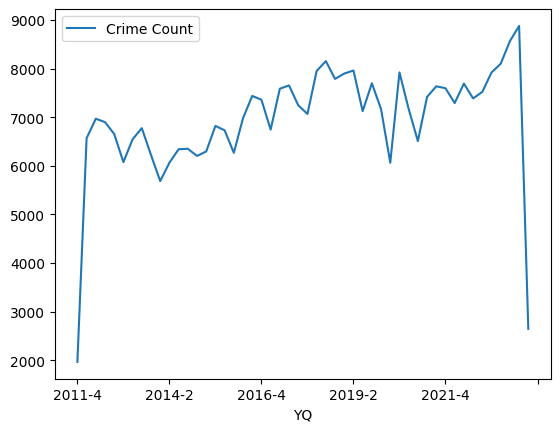

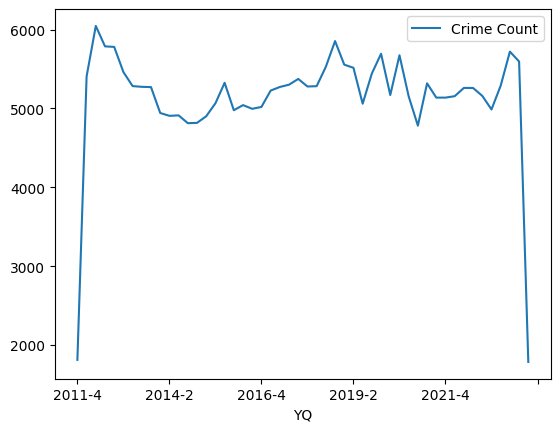

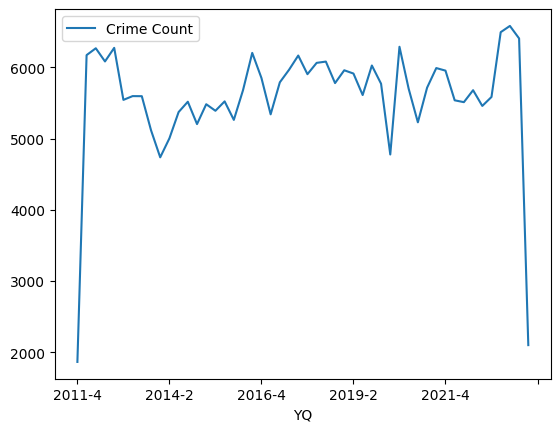

In [21]:
crime_by_boroughs = ql.rename(columns={"Crime ID": "Crime Count"})
crime_by_boroughs.groupby("Borough").plot(x="YQ", y=["Crime Count"])


In [22]:
#%pip install polars 
#%pip install hvplot
#%pip install geoviews, cartopy
#%pip install datashader
#%pip install jupyter_bokeh

In [23]:
import polars as pl

In [24]:
pql = pl.DataFrame(ql)

pql.head()

Year,Quarter,Borough,Crime ID,YQ
str,i64,str,i64,str
"""2011""",4,"""Barking and Dagenham""",1374,"""2011-4"""
"""2011""",4,"""Barnet""",1965,"""2011-4"""
"""2011""",4,"""Bexley""",806,"""2011-4"""
"""2011""",4,"""Brent""",2342,"""2011-4"""
"""2011""",4,"""Bromley""",1782,"""2011-4"""


In [25]:
pql.plot(y="Crime ID", x="YQ", by="Borough")

:NdOverlay   [Borough]
   :Curve   [YQ]   (Crime ID)

In [26]:
non_asbp = non_asb.copy()
non_asbp["YQ"] = non_asb["Year"].apply(lambda x: str(x)) + "-" + non_asb["Quarter"].apply(lambda x: str(x))
pcrs = pl.DataFrame(non_asbp)

In [27]:
pcrg = pcrs.group_by(["Crime type", "Year", "Quarter"]).n_unique()[["Crime type", "Year", "Quarter", "Crime ID"]]
pcrg

Crime type,Year,Quarter,Crime ID
str,str,i64,u32
"""Bicycle theft""","""2013""",2,3553
"""Vehicle crime""","""2012""",1,24840
"""Robbery""","""2020""",2,3796
"""Other theft""","""2022""",4,34745
"""Drugs""","""2023""",2,9109
…,…,…,…
"""Other crime""","""2016""",1,2451
"""Theft from the person""","""2015""",2,9114
"""Drugs""","""2019""",4,10226


In [28]:
pcrg = pcrg.with_columns(dt = pl.date(pl.col("Year"), (pl.col("Quarter"))*3, 1))
pcrg

Crime type,Year,Quarter,Crime ID,dt
str,str,i64,u32,date
"""Bicycle theft""","""2013""",2,3553,2013-06-01
"""Vehicle crime""","""2012""",1,24840,2012-03-01
"""Robbery""","""2020""",2,3796,2020-06-01
"""Other theft""","""2022""",4,34745,2022-12-01
"""Drugs""","""2023""",2,9109,2023-06-01
…,…,…,…,…
"""Other crime""","""2016""",1,2451,2016-03-01
"""Theft from the person""","""2015""",2,9114,2015-06-01
"""Drugs""","""2019""",4,10226,2019-12-01


In [29]:
pcrg.plot(x="dt", y="Crime ID", by="Crime type", width=1200,height=800)

:NdOverlay   [Crime type]
   :Curve   [dt]   (Crime ID)

In [30]:
crime_pl = pl.DataFrame(non_asbp)
crime_pl.head()

Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Borough,Year,Quarter,YQ
str,str,str,str,f64,f64,str,str,str,str,str,f64,str,str,i64,str
"""d44d2e44e5ffdb23a9246a6b643781…","""12""","""Metropolitan Police Service""","""Metropolitan Police Service""",0.135554,51.584985,"""On or near Rose Lane""","""E01000027""","""Barking and Dagenham 001A""","""Burglary""",null,null,"""Barking and Dagenham""","""2011""",4,"""2011-4"""
"""a27350b5f3c9f91f082e9d4f2f7241…","""12""","""Metropolitan Police Service""","""Metropolitan Police Service""",0.134947,51.588063,"""On or near Mead Grove""","""E01000027""","""Barking and Dagenham 001A""","""Burglary""",null,null,"""Barking and Dagenham""","""2011""",4,"""2011-4"""
"""41da16507d675c56eff4a9fba75507…","""12""","""Metropolitan Police Service""","""Metropolitan Police Service""",0.141143,51.590873,"""On or near Furze Farm Close""","""E01000027""","""Barking and Dagenham 001A""","""Burglary""",null,null,"""Barking and Dagenham""","""2011""",4,"""2011-4"""
"""5d8fb40b2496567057345c699043e8…","""12""","""Metropolitan Police Service""","""Metropolitan Police Service""",0.135866,51.587336,"""On or near Gibbfield Close""","""E01000027""","""Barking and Dagenham 001A""","""Burglary""",null,null,"""Barking and Dagenham""","""2011""",4,"""2011-4"""
"""709e0408bb402ab0b0358519c27662…","""12""","""Metropolitan Police Service""","""Metropolitan Police Service""",0.141143,51.590873,"""On or near Furze Farm Close""","""E01000027""","""Barking and Dagenham 001A""","""Criminal damage and arson""",null,null,"""Barking and Dagenham""","""2011""",4,"""2011-4"""


In [41]:
from holoviews.operation.datashader import dynspread
dynspread.max_px=3
crime_pl.plot.points(x="Longitude", y="Latitude",datashade=True, dynspread=True, threshold=0.5, max_px=3, geo=True, tiles="CartoLight", width=500, height=500, legend=True, groupby=["Crime type", "YQ"])

BokehModel(combine_events=True, render_bundle={'docs_json': {'6677f482-bab1-4cce-ab02-0b08afa54c57': {'version…

In [32]:
import hvplot

hvplot.help('points')


A `points` plot visualizes positions in a 2D space. This is useful for example for
geographic plots.

There is no assumption that 'y' depends on 'x'. This is different from a `scatter` plot
which assumes that `y` depends `x`.

Reference: https://hvplot.holoviz.org/reference/geopandas/points.html

Parameters
----------
x : string, optional
    The coordinate variable along the x-axis. Default is the first numeric field.
y : string, optional
    The coordinate variable along the y-axis. Default is the second numeric field.
c : string, optional
    The dimension to color the points by
s : int, optional, also available as 'size'
    The size of the marker
marker : string, optional
    The marker shape specified above can be any supported by matplotlib, e.g. s, d, o etc.
    See https://matplotlib.org/stable/api/markers_api.html.
scale: number, optional
    Scaling factor to apply to point scaling.
logz : bool
    Whether to apply log scaling to the z-axis. Default is False.
**kwds : optio

In [33]:
del street

In [34]:
del stns

In [35]:
del non_asb
del non_asbp

In [36]:
del asbs

In [37]:
del ql